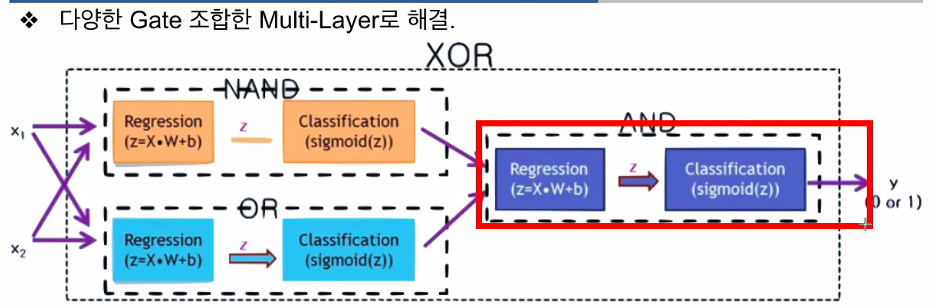

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [ ]:
(x_train, y_train), (x_test, y_test)= load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

57344/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [15]:
import pandas as pd

df= pd.DataFrame(x_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [21]:
df= pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


# Model and fit

In [ ]:
model= tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.Input(shape=(13))) # input layer. shape=(x_train, y_train)의 열 수
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # 기능 layer
model.add(tf.keras.layers.Dense(1)) # output layer. activation=None -> Regression

# Regression 사용// y가 연속형: 아웃풋 1개/ y가 분류형: 아웃풋 분류하는 만큼

model.compile(optimizer= 'sgd', loss= 'mse')

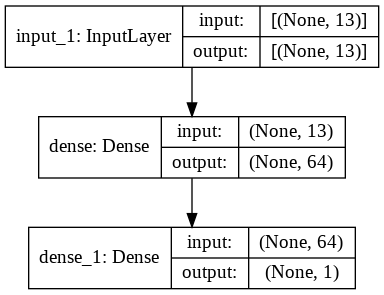

In [ ]:
tf.keras.utils.plot_model(model, show_shapes= True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 83.2825
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 84.2674
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 84.2950
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 85.6343
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 84.5370
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 82.5951
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 84.2790
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 85.0674
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 83.4184
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 84.8782
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 84.0815
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 83.3348
Epoch 13/100
13/13 [=====

# Evaluation

In [13]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 77.1004


77.10035705566406

# Service

In [22]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

In [23]:
model.predict([[0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491 ]])

array([[13.480284]], dtype=float32)

In [24]:
y_train[10]

12.1